In [210]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler , OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error 

import seaborn as sns

In [211]:
df = pd.read_csv('zomato.csv')
df.sample(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4472,https://www.zomato.com/bangalore/eat-fit-bella...,"39/12, 5th Main Road, Iblur Village, Outer Rin...",eat.fit,Yes,No,4.4/5,632,NaN,Bellandur,Delivery,"Buddha Bowl, Chicken Curry, Brownie, Chole, Ve...","Healthy Food, North Indian, Biryani, Continent...",500,"[('Rated 4.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...","['Fruit Pop Oatmeal Bowl', 'Idli-Sambar With C...",Desserts,Bellandur
34924,https://www.zomato.com/bangalore/maa-bhook-lag...,"927 H, 1st Floor, 1st A Main, Koramangala 4th ...",Maa Bhook Lagi,Yes,No,3.9 /5,297,+91 8197726028,Koramangala 4th Block,"Takeaway, Delivery","Chole, Kheer, Biryani, Liti Chokha, Litti, Chu...",North Indian,400,"[('Rated 4.0', 'RATED\n I have ordered a few ...","['Aloo Pyaz Ke Parathe', 'Veg MealBox', 'Panee...",Delivery,Koramangala 7th Block


In [212]:
df = df[df['location'] != 'Peenya'] 

In [213]:
df.shape

(51716, 17)

In [214]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28077
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51716 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51716 non-null  object
 1   address                      51716 non-null  object
 2   name                         51716 non-null  object
 3   online_order                 51716 non-null  object
 4   book_table                   51716 non-null  object
 5   rate                         43941 non-null  object
 6   votes                        51716 non-null  int64 
 7   phone                        50508 non-null  object
 8   location                     51695 non-null  object
 9   rest_type                    51489 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51671 non-null  object
 12  approx_cost(for two people)  51370 non-null  object
 13  reviews_list                 51716 n

In [216]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [217]:
df.shape

(51716, 17)

In [218]:
olddf = df[(df['rate'] != "NEW") & (df['rate'] != "-")]

In [219]:
olddf.shape

(49439, 17)

In [220]:
newdf = df[(df['rate'] == "NEW") | (df['rate'] == "-")]

In [221]:
newdf.shape

(2277, 17)

In [222]:
olddf.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1190
location                          21
rest_type                        225
dish_liked                     25947
cuisines                          45
approx_cost(for two people)      341
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Data cleaning and handling missing values for olddf

In [223]:
olddf['rate'] = olddf['rate'].str.replace('/5','',regex=False).astype(float)

In [224]:
olddf= olddf.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'},)

In [225]:
olddf['cost'] = olddf['cost'].str.replace(',','').astype(float)

In [226]:
olddf.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1190
location           21
rest_type         225
dish_liked      25947
cuisines           45
cost              341
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [227]:
olddf.dropna(subset=['cost'],inplace=True)

In [228]:
olddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49098 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           49098 non-null  object 
 1   address       49098 non-null  object 
 2   name          49098 non-null  object 
 3   online_order  49098 non-null  object 
 4   book_table    49098 non-null  object 
 5   rate          41417 non-null  float64
 6   votes         49098 non-null  int64  
 7   phone         48237 non-null  object 
 8   location      49098 non-null  object 
 9   rest_type     48896 non-null  object 
 10  dish_liked    23356 non-null  object 
 11  cuisines      49079 non-null  object 
 12  cost          49098 non-null  float64
 13  reviews_list  49098 non-null  object 
 14  menu_item     49098 non-null  object 
 15  type          49098 non-null  object 
 16  city          49098 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


## Checking distribution of rate wrt votes and cost

In [229]:
import seaborn as sns

<Axes: xlabel='votes', ylabel='rate'>

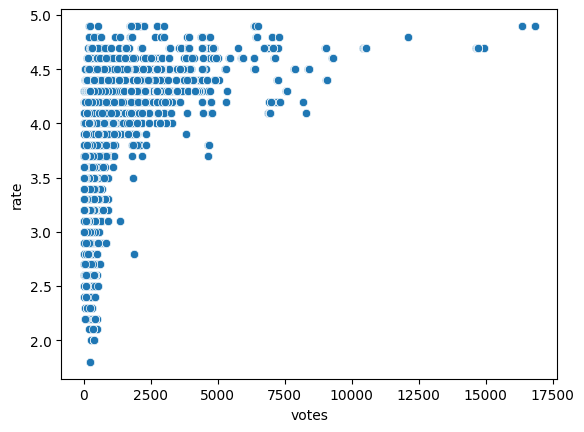

In [230]:
sns.scatterplot(olddf,x='votes',y='rate')

<Axes: xlabel='cost', ylabel='rate'>

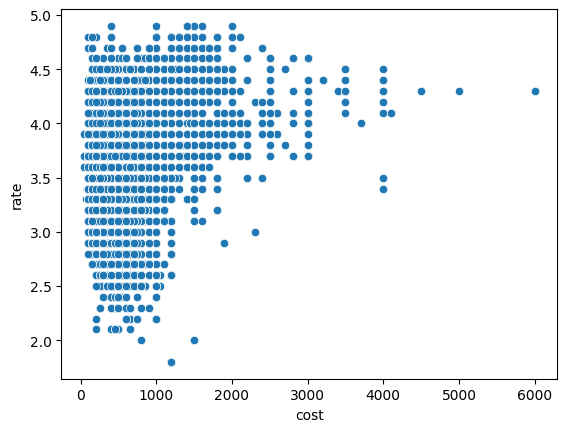

In [231]:
sns.scatterplot(olddf,x='cost',y='rate')

### As the missing rate values are more than 15% using ml to fill them

In [232]:
df_complete = olddf[olddf['rate'].notna()]
df_missing = olddf[olddf['rate'].isna()]

In [233]:
x = df_complete[['votes','cost']]
y = df_complete['rate']

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [236]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [237]:
y_pred = model.predict(x_test)

In [238]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.6385995209800899


In [239]:
xg_model = XGBRegressor(n_estimators=100, max_depth=8, random_state=42)
xg_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [240]:
y_pred = xg_model.predict(x_test)

In [241]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.57798539335896


### Using random forest

In [242]:
x_missing = df_missing[['votes','cost']]

In [243]:
predicted_rates = model.predict(x_missing)

In [244]:
df_missing['rate'] = predicted_rates

In [245]:
olddf = pd.concat([df_complete,df_missing])

In [246]:
olddf.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone             861
location            0
rest_type         202
dish_liked      25742
cuisines           19
cost                0
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [247]:
olddf.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [248]:
## dropping less important columns
olddf.drop(columns=['url','address','name','votes','phone','dish_liked','cuisines','reviews_list','menu_item'],inplace=True)

In [249]:
olddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49098 entries, 0 to 51714
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  49098 non-null  object 
 1   book_table    49098 non-null  object 
 2   rate          49098 non-null  float64
 3   location      49098 non-null  object 
 4   rest_type     48896 non-null  object 
 5   cost          49098 non-null  float64
 6   type          49098 non-null  object 
 7   city          49098 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB


## Data cleaning and handling missing values for newddf

In [250]:
newdf.drop(columns=['url','address','name','votes','phone','dish_liked','cuisines','reviews_list','menu_item'],inplace=True)

In [251]:
newdf.isnull().sum()

online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      2
approx_cost(for two people)    5
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [252]:
newdf.dropna(inplace=True)

In [253]:
newdf.isnull().sum()

online_order                   0
book_table                     0
rate                           0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [254]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2270 entries, 72 to 51605
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 2270 non-null   object
 1   book_table                   2270 non-null   object
 2   rate                         2270 non-null   object
 3   location                     2270 non-null   object
 4   rest_type                    2270 non-null   object
 5   approx_cost(for two people)  2270 non-null   object
 6   listed_in(type)              2270 non-null   object
 7   listed_in(city)              2270 non-null   object
dtypes: object(8)
memory usage: 159.6+ KB


In [255]:
newdf.shape

(2270, 8)

In [256]:
newdf= newdf.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'},)

In [257]:
newdf.head()

,online_order,book_table,rate,location,rest_type,cost,type,city
72,No,No,NEW,Banashankari,Quick Bites,150,Delivery,Banashankari
75,No,No,NEW,Banashankari,"Takeaway, Delivery",500,Delivery,Banashankari
110,No,No,NEW,Banashankari,"Takeaway, Delivery",200,Delivery,Banashankari
130,No,No,NEW,Banashankari,"Takeaway, Delivery",200,Delivery,Banashankari
131,No,No,NEW,Banashankari,Quick Bites,100,Delivery,Banashankari


In [258]:
newdf['cost'] = newdf['cost'].str.replace(',','').astype(float)

In [259]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2270 entries, 72 to 51605
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  2270 non-null   object 
 1   book_table    2270 non-null   object 
 2   rate          2270 non-null   object 
 3   location      2270 non-null   object 
 4   rest_type     2270 non-null   object 
 5   cost          2270 non-null   float64
 6   type          2270 non-null   object 
 7   city          2270 non-null   object 
dtypes: float64(1), object(7)
memory usage: 159.6+ KB


In [260]:
newdf.rate.unique() ## great

array(['NEW', '-'], dtype=object)

## Column Transfor

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first'), ['online_order', 'book_table', 'location','rest_type','type','city']),
    ],
    remainder='passthrough'
)

In [135]:
x = olddf.drop('rate' , axis =1)
y = olddf['rate']

In [136]:
x.shape

(49098, 7)

In [137]:
y.shape

(49098,)

In [138]:
x.head()

,online_order,book_table,location,rest_type,cost,type,city
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari


### Splitting data into test train split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=42)
x_train.head()
y_train.head()

34067    3.900000
15389    3.521589
21372    3.700000
15034    3.600000
30543    3.500000
Name: rate, dtype: float64

In [140]:
type(x_test)

pandas.core.frame.DataFrame

In [141]:
X_train_prepared = preprocessor.fit_transform(x_train)
X_test_prepared  = preprocessor.transform(x_test)

In [142]:
X_train_prepared = X_train_prepared.toarray()
X_test_prepared = X_test_prepared.toarray()

In [143]:
X_train_df = pd.DataFrame(X_train_prepared, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_prepared, columns=preprocessor.get_feature_names_out())

In [144]:
X_train_df

,ohe__online_order_Yes,ohe__book_table_Yes,ohe__location_Banashankari,ohe__location_Banaswadi,ohe__location_Bannerghatta Road,ohe__location_Basavanagudi,ohe__location_Basaveshwara Nagar,ohe__location_Bellandur,ohe__location_Bommanahalli,ohe__location_Brigade Road,...,ohe__city_MG Road,ohe__city_Malleshwaram,ohe__city_Marathahalli,ohe__city_New BEL Road,ohe__city_Old Airport Road,ohe__city_Rajajinagar,ohe__city_Residency Road,ohe__city_Sarjapur Road,ohe__city_Whitefield,remainder__cost
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0
41729,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
41730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1000.0
41731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0


### Model Training

In [145]:
X_train_df.shape

(41733, 222)

In [146]:
X_test_df.shape

(7365, 222)

In [147]:
y_test.shape

(7365,)

In [148]:
y_train.shape

(41733,)

In [151]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor


In [152]:
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=0.0001), random_state=42)
bagging.fit(X_train_df, y_train)
y_predict_bag = bagging.predict(X_test_df)
print("Bagging R²:", r2_score(y_test, y_predict_bag))


Bagging R²: 0.4534705197031642


In [153]:
adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=0.0001), random_state=42)
adaboost.fit(X_train_df, y_train)
y_predict_ada = adaboost.predict(X_test_df)
print("AdaBoost R²:", r2_score(y_test, y_predict_ada))


AdaBoost R²: 0.4221908633267042


In [154]:
rf = RandomForestRegressor(min_samples_leaf=0.0001, random_state=42)
rf.fit(X_train_df, y_train)
y_predict_rf = rf.predict(X_test_df)
print("Random Forest R²:", r2_score(y_test, y_predict_rf))


Random Forest R²: 0.4661835938030817


In [155]:
gboost = GradientBoostingRegressor(min_samples_leaf=0.0001, random_state=42)
gboost.fit(X_train_df, y_train)
y_predict_gboost = gboost.predict(X_test_df)
print("Gradient Boosting R²:", r2_score(y_test, y_predict_gboost))


Gradient Boosting R²: 0.3102793624689759


In [156]:
xgb = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb.fit(X_train_df, y_train)
y_predict_xgb = xgb.predict(X_test_df)
print("XGBoost R²:", r2_score(y_test, y_predict_xgb))


XGBoost R²: 0.3087523369385582


In [158]:

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train_df,y_train)
y_predict=DTree.predict(X_test_df)

print("DT regressor R²:",r2_score(y_test,y_predict))

DT regressor R²: 0.44350727205178764


In [343]:
y_test[:10]

46980    4.2
27523    4.5
43010    3.3
44508    3.0
49469    3.9
2042     3.6
19889    3.0
7893     4.2
5979     3.5
48471    3.3
Name: rate, dtype: float64

In [159]:
y_predict_rf[:10]

array([4.05770201, 3.40802303, 3.42425062, 4.49534863, 3.81584837,
       3.79806096, 4.12353695, 4.19115312, 4.49681639, 3.72488286])

In [160]:
## using random forest regressor

In [166]:
threshold = 4

# Create binary “success/failure” arrays (1 = success, 0 = failure)
Y_testfinal = (y_test > threshold).astype(int)
Y_predfinal = (y_predict_rf > threshold).astype(int)


In [167]:
Y_testfinal[:10]

30985    0
15323    0
39033    0
26558    1
34674    0
29766    0
21043    1
47536    1
43257    1
38962    0
Name: rate, dtype: int32

In [168]:
Y_predfinal[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [169]:
accuracy = accuracy_score(Y_testfinal, Y_predfinal)
print("Accuracy:", accuracy)

Accuracy: 0.9084860828241683


# Predicting success of new restaurant

In [196]:
def Predict_success(online, bookings, location, rest_type, cost, type, city):
    # Create DataFrame with proper column names
    test_input = pd.DataFrame([[online, bookings, location, rest_type, cost, type, city]],
                              columns=['online_order', 'book_table', 'location', 'rest_type', 'cost', 'type', 'city'])

    test_input_processed = preprocessor.transform(test_input)
    y_predict = rf.predict(test_input_processed)

    return "Success" if y_predict >= 3.8 else "Failure"

In [197]:
ans = Predict_success('No', 'No', 'Koramangala 6th Block', 'Quick Bites', 3000, 'Desserts', 'Koramangala 5th Block')

In [198]:
ans

'Success'

In [199]:
newdf.head(2)

,online_order,book_table,rate,location,rest_type,cost,type,city
72,No,No,NEW,Banashankari,Quick Bites,150.0,Delivery,Banashankari
75,No,No,NEW,Banashankari,"Takeaway, Delivery",500.0,Delivery,Banashankari


In [200]:
import warnings
warnings.filterwarnings("ignore")

In [201]:
testing_df = newdf.drop(columns=['rate'])

In [202]:

results = []

for _, row in testing_df.iterrows():
    result = Predict_success(
        row['online_order'],
        row['book_table'],
        row['location'],
        row['rest_type'],
        row['cost'],
        row['type'],
        row['city']
    )
    results.append(result)


In [203]:
testing_df['prediction'] = results

In [204]:
testing_df['prediction'].value_counts()

prediction
Failure    1901
Success     369
Name: count, dtype: int64

In [208]:
new_restaurant_success = testing_df

In [209]:
new_restaurant_success.sample(11)

,online_order,book_table,location,rest_type,cost,type,city,prediction
8848,Yes,No,Jayanagar,Casual Dining,800.0,Delivery,BTM,Success
30035,Yes,No,HSR,Cafe,600.0,Delivery,Koramangala 5th Block,Failure
18390,No,No,Ulsoor,Quick Bites,150.0,Delivery,Indiranagar,Failure
6974,No,No,Brookefield,Mess,300.0,Delivery,Brookefield,Failure
24054,Yes,No,Nagawara,Quick Bites,200.0,Delivery,Kalyan Nagar,Failure
17026,No,No,HSR,Quick Bites,200.0,Dine-out,HSR,Failure
32077,Yes,No,Koramangala 1st Block,"Casual Dining, Bar",600.0,Pubs and bars,Koramangala 5th Block,Success
15957,Yes,No,Bellandur,"Takeaway, Delivery",500.0,Delivery,HSR,Failure
34648,No,No,BTM,Quick Bites,200.0,Dine-out,Koramangala 6th Block,Failure
6273,No,No,Residency Road,Casual Dining,800.0,Dine-out,Brigade Road,Success
